# Malicious URL Detector (Training Phase + Testing Phase)

## Importing necessary modules

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import pickle
import joblib 

In [45]:
import numpy as np
import pandas as pd

df=pd.read_csv("dataset.csv",encoding="latin1")
df

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [46]:
feature_names_df = ['having_IPhaving_IP_Address','URLURL_Length','having_At_Symbol','double_slash_redirecting','Prefix_Suffix','having_Sub_Domain','Domain_registeration_length','HTTPS_token','SFH','Submitting_to_email','Abnormal_URL','Redirect','age_of_domain','DNSRecord','web_traffic']
x_df = df[feature_names_df]
y_df = df['Result']

## Plotting Feature Importance

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


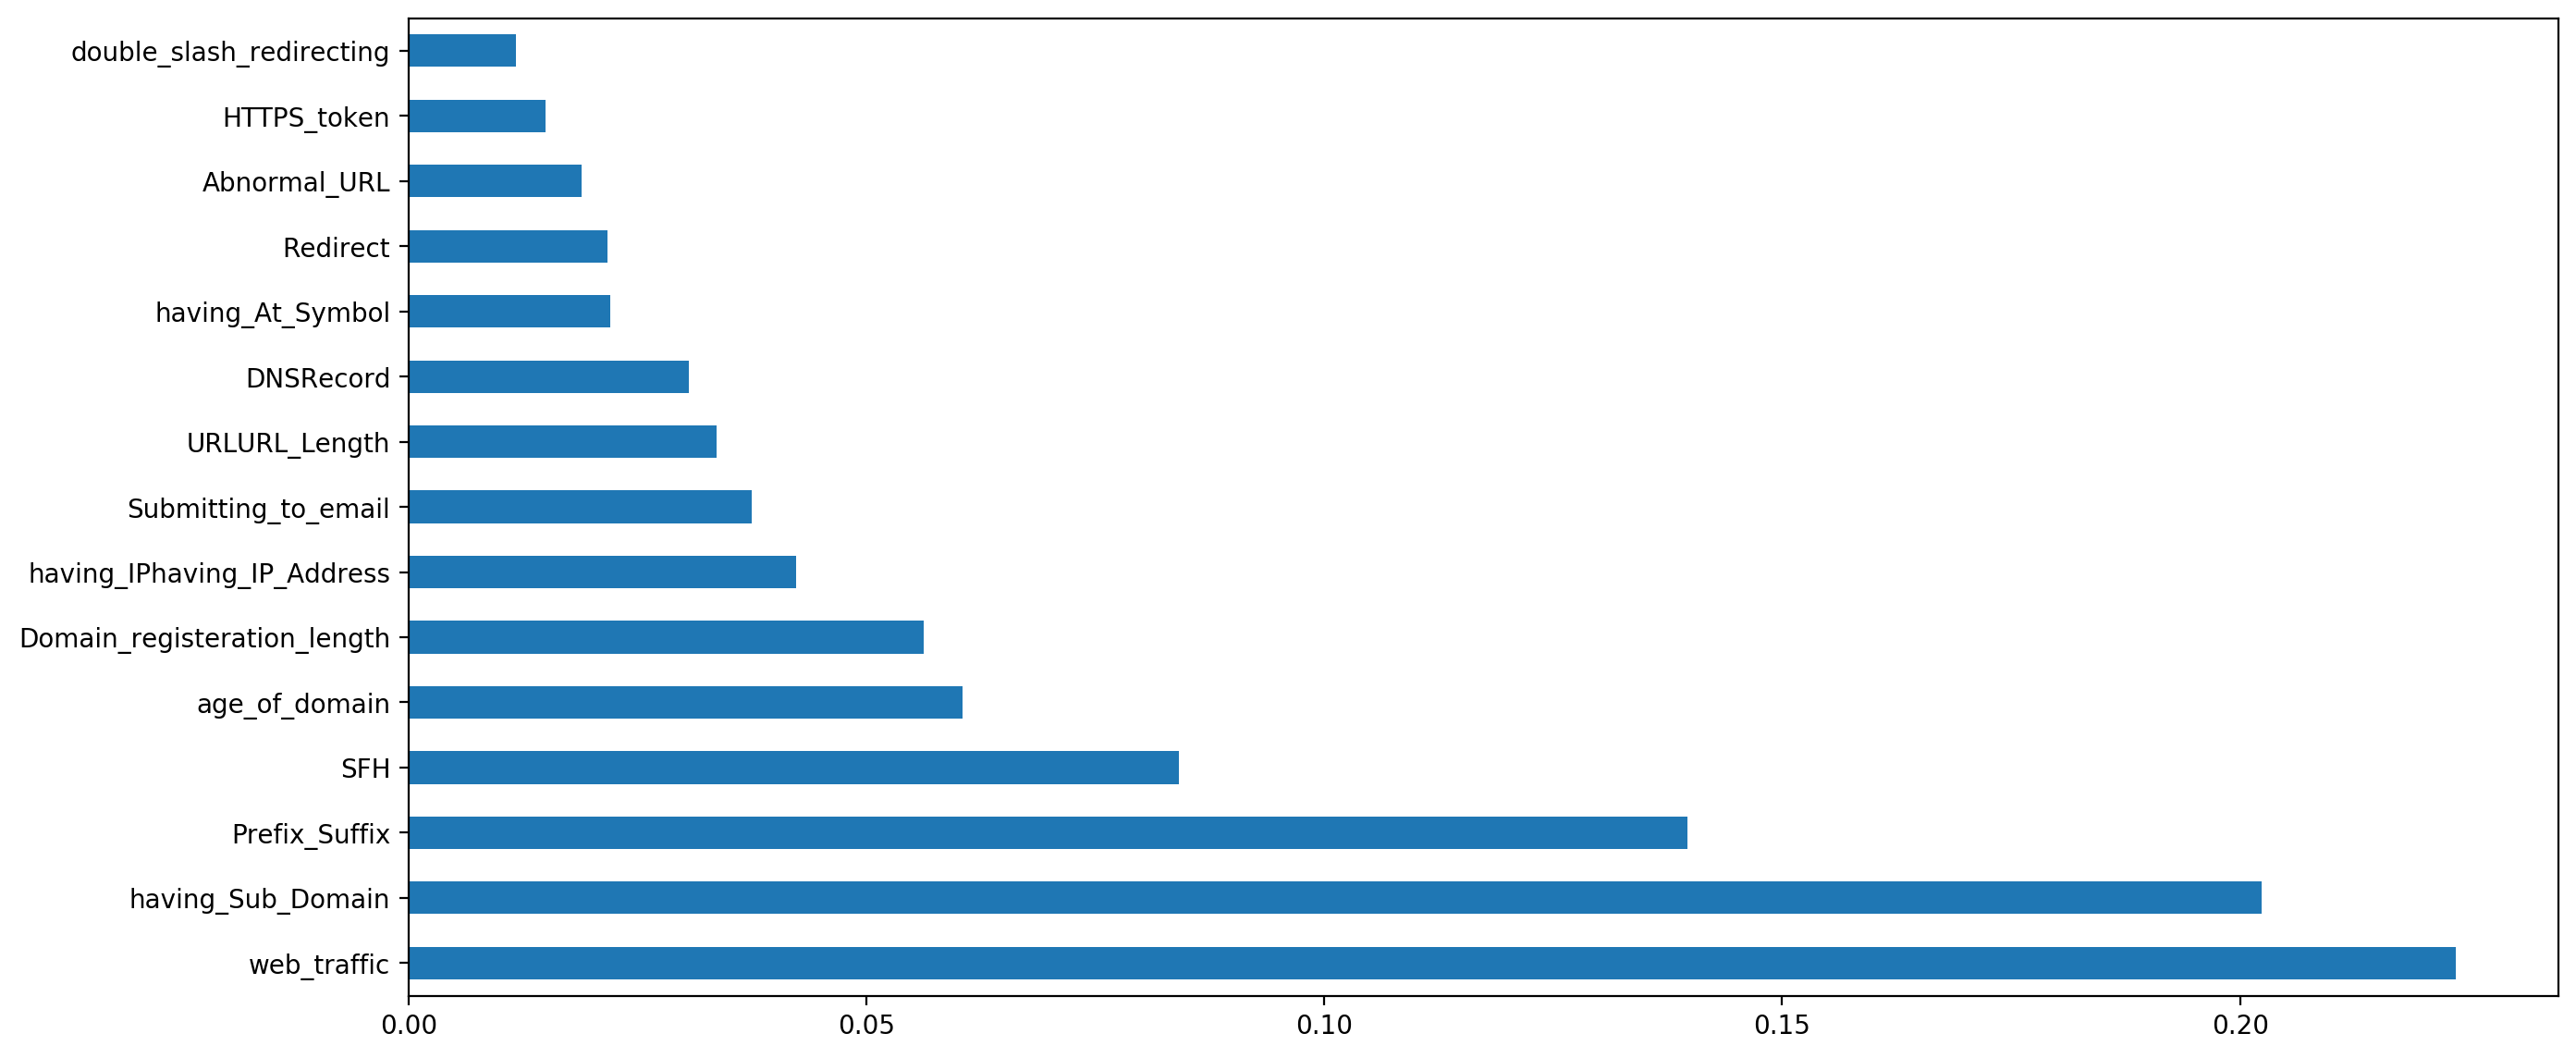

In [47]:
import pandas as pd
import numpy as np
X = x_df    #independent columns
y = y_df    #target column 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
fig, ax = plt.subplots(figsize=(15,7),dpi=200)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [48]:
x_df

,having_IPhaving_IP_Address,URLURL_Length,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,HTTPS_token,SFH,Submitting_to_email,Abnormal_URL,Redirect,age_of_domain,DNSRecord,web_traffic
0,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1
1,1,1,1,1,-1,0,-1,-1,-1,1,1,0,-1,-1,0
2,1,0,1,1,-1,-1,-1,-1,-1,-1,-1,0,1,-1,1
3,1,0,1,1,-1,-1,1,-1,-1,1,1,0,-1,-1,1
4,1,0,1,1,-1,1,-1,1,-1,1,1,0,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,-1,1,1,1,-1,1,-1,-1,1,0,1,1,-1
11051,-1,1,-1,-1,-1,1,-1,1,0,-1,-1,1,1,1,1
11052,1,-1,1,1,-1,1,-1,1,-1,1,1,0,1,1,1
11053,-1,-1,1,1,-1,-1,1,1,-1,1,1,0,1,1,1


## Applying train test split on data

In [66]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.1,random_state=42)

In [67]:
X_train

,having_IPhaving_IP_Address,URLURL_Length,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,HTTPS_token,SFH,Submitting_to_email,Abnormal_URL,Redirect,age_of_domain,DNSRecord,web_traffic
1562,1,1,1,1,-1,-1,-1,1,1,1,1,0,1,-1,-1
10405,-1,-1,1,-1,1,1,-1,-1,-1,1,-1,1,1,-1,1
5425,1,-1,1,1,-1,0,-1,1,-1,1,1,0,-1,1,0
11018,-1,-1,1,1,-1,0,1,1,-1,1,1,0,1,1,1
3297,1,-1,1,1,-1,-1,1,1,-1,1,1,0,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-1,0,1,1,-1,0,1,-1,-1,1,1,0,-1,1,1
5191,1,1,-1,1,-1,1,1,1,-1,1,1,0,-1,1,-1
5390,-1,1,-1,1,-1,0,1,1,-1,1,1,0,1,1,0
860,1,-1,1,1,-1,1,1,1,-1,-1,1,0,1,1,-1


## AdaBoostClassifier

In [68]:
from sklearn.ensemble import AdaBoostClassifier

 
clf = AdaBoostClassifier(n_estimators=1000, random_state=0)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.7970650316614735

In [69]:
predictions = model.predict((X_test))


In [70]:
print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(y_test, predictions,target_names=['1','-1']))

accuracy 0.8851717902350814
              precision    recall  f1-score   support

           1       0.88      0.86      0.87       481
          -1       0.89      0.91      0.90       625

    accuracy                           0.89      1106
   macro avg       0.88      0.88      0.88      1106
weighted avg       0.89      0.89      0.89      1106



## Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', multi_class='auto',max_iter=100)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

# Predict the transformed test documents
predictions = model.predict((X_test))

print('AUC: ', multiclass_roc_auc_score(y_test, predictions))

AUC:  0.7878203742203743


In [73]:
print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(y_test, predictions,target_names=['1','-1']))

accuracy 0.7929475587703436
              precision    recall  f1-score   support

           1       0.77      0.75      0.76       481
          -1       0.81      0.83      0.82       625

    accuracy                           0.79      1106
   macro avg       0.79      0.79      0.79      1106
weighted avg       0.79      0.79      0.79      1106



## RandomForest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=400,criterion='entropy')
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## ROC score of RandomForest Classifier

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing


predictions = model.predict((X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8614819126819127


In [76]:
model.score(X_train,y_train)

0.888129460247261

In [77]:
print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(y_test, predictions,target_names=['1','-1']))

accuracy 0.8661844484629295
              precision    recall  f1-score   support

           1       0.86      0.83      0.84       481
          -1       0.87      0.90      0.88       625

    accuracy                           0.87      1106
   macro avg       0.87      0.86      0.86      1106
weighted avg       0.87      0.87      0.87      1106



In [17]:
print (X_test)

      having_IPhaving_IP_Address  URLURL_Length  having_At_Symbol  \
226                            1             -1                 1   
2252                           1             -1                 1   
2646                           1             -1                 1   
6444                           1             -1                 1   
1387                           1             -1                 1   
3636                           1             -1                 1   
1242                           1              1                 1   
654                            1             -1                -1   
9260                          -1             -1                 1   
3927                           1             -1                 1   
8959                           1             -1                 1   
9971                           1             -1                 1   

      double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \
226                          1    

## Predicting a sample

In [19]:
l=model.predict([[1,1,1,1,-1,1,1,-1,1,-1,1,-1,-1,-1,-1]])
l

array([-1], dtype=int64)

In [20]:
l[0]

-1

## Pickling the model for use in Chrome extension and Web Application

In [21]:
filename = 'phish_trainedv9mud0.001.sav'
pickle.dump(model, open(filename, 'wb'))

## Feature Extraction Phase

In [23]:
import whois
import datetime
text=input()
aburl=-1
digits="0123456789"
if text[8] in digits:
    oneval=-1
else:
    oneval=1    
if len(text)>170:
    secval=-1
else:
    secval=1  
if "@" in text:
    thirdval=-1
else:
    thirdval=1    
k=text.count("//")          
if k>1:
    fourthval=-1
else:
    fourthval=1  
if "-" in text:
    fifthval=-1
else:
    fifthval=1         
if "https" in text:
    sixthval=1
else:
    sixthval=-1
#subdomain ignored    

temp=text
temp=temp[6:]
k1=temp.count("https")

if k1 >=1:
    seventhval=-1
else:
    seventhval=1
if "about:blank" in text:
    eighthval=-1
else:
    eighthval=1
if "mail()" or "mailto:" in text:
    ninthval=-1
else:
    ninthval=1
re=text.count("//")          
if re>3:
    tenthval=-1
else:
    tenthval=1    

import whois
from datetime import datetime

url=text

try:
    res=whois.whois(url)
    print (res)
    #print (len(res['creation_date']))
    try:
        a=res['creation_date'][0]
        b=datetime.now()
        c=b-a
        d=c.days
    except:
        a=res['creation_date']
        b=datetime.now()
        c=b-a
        d=c.days
    #print (d)
    if d>365:
        eleventhval=1
    else:
        eleventhval=-1
except:
    aburl=1
    eleventhval=-1   

if aburl==1:
    twelthval=-1
else:
    twelthval=1    
    
import urllib.request, sys, re
import xmltodict, json

try:
    xml = urllib.request.urlopen('http://data.alexa.com/data?cli=10&dat=s&url={}'.format(text)).read()

    result= xmltodict.parse(xml)

    data = json.dumps(result).replace("@","")
    data_tojson = json.loads(data)
    url = data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["URL"]
    rank= int(data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["TEXT"])
    print (rank)
    if rank<=100000:
        thirt=1
    else:
        thirt=-1
    print (thirt)    
except:
    thirt=-1
    print (thirt)
    
print("site {site}, rank {rank}".format(site=url,rank=rank))    


print (oneval) #having ip   
print (secval) #length
print (thirdval) #atvalue
print (fourthval) #double slash
print (fifthval) #prefix suffix
#print (sixthval) #ssl
print (seventhval) #https token
print (eighthval) #sfh
print (ninthval) #submit to mail
print (tenthval) #redirect
print (eleventhval) #age of domain
print (twelthval) #abnormal url
print (thirt)

https://www.google.com
{
  "domain_name": [
    "GOOGLE.COM",
    "google.com"
  ],
  "registrar": "MarkMonitor, Inc.",
  "whois_server": "whois.markmonitor.com",
  "referral_url": null,
  "updated_date": [
    "2019-09-09 15:39:04",
    "2019-09-09 08:39:04"
  ],
  "creation_date": [
    "1997-09-15 04:00:00",
    "1997-09-15 00:00:00"
  ],
  "expiration_date": [
    "2028-09-14 04:00:00",
    "2028-09-13 00:00:00"
  ],
  "name_servers": [
    "NS1.GOOGLE.COM",
    "NS2.GOOGLE.COM",
    "NS3.GOOGLE.COM",
    "NS4.GOOGLE.COM",
    "ns4.google.com",
    "ns3.google.com",
    "ns1.google.com",
    "ns2.google.com"
  ],
  "status": [
    "clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited",
    "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
    "clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited",
    "serverDeleteProhibited https://icann.org/epp#serverDeleteProhibited",
    "serverTransferProhibited https://icann.org/epp#serve

In [24]:
import whois
import datetime
text=input()
aburl=-1
digits="0123456789"
if text[8] in digits:
    oneval=-1
else:
    oneval=1    
if len(text)>170:
    secval=-1
else:
    secval=1  
if "@" in text:
    thirdval=-1
else:
    thirdval=1    
k=text.count("//")          
if k>1:
    fourthval=-1
else:
    fourthval=1  
if "-" in text:
    fifthval=-1
else:
    fifthval=1         
if "https" in text:
    sixthval=1
else:
    sixthval=-1
#subdomain ignored    

temp=text
temp=temp[6:]
k1=temp.count("https")

if k1 >=1:
    seventhval=-1
else:
    seventhval=1
if "about:blank" in text:
    eighthval=-1
else:
    eighthval=1
if "mail()" or "mailto:" in text:
    ninthval=-1
else:
    ninthval=1
re=text.count("//")          
if re>3:
    tenthval=-1
else:
    tenthval=1    

import whois
from datetime import datetime

url=text

try:
    res=whois.whois(url)
    print (res)
    #print (len(res['creation_date']))
    try:
        a=res['creation_date'][0]
        b=datetime.now()
        c=b-a
        d=c.days
    except:
        a=res['creation_date']
        b=datetime.now()
        c=b-a
        d=c.days
    #print (d)
    if d>365:
        eleventhval=1
    else:
        eleventhval=-1
except:
    aburl=1
    eleventhval=-1   

if aburl==1:
    twelthval=-1
else:
    twelthval=1    
    
import urllib.request, sys, re
import xmltodict, json

try:
    xml = urllib.request.urlopen('http://data.alexa.com/data?cli=10&dat=s&url={}'.format(text)).read()

    result= xmltodict.parse(xml)

    data = json.dumps(result).replace("@","")
    data_tojson = json.loads(data)
    url = data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["URL"]
    rank= int(data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["TEXT"])
    print (rank)
    if rank<=100000:
        thirt=1
    else:
        thirt=-1
    print (thirt)    
except:
    thirt=-1
    print (thirt)
    
print("site {site}, rank {rank}".format(site=url,rank=rank))    


print (oneval) #having ip   
print (secval) #length
print (thirdval) #atvalue
print (fourthval) #double slash
print (fifthval) #prefix suffix
#print (sixthval) #ssl
print (seventhval) #https token
print (eighthval) #sfh
print (ninthval) #submit to mail
print (tenthval) #redirect
print (eleventhval) #age of domain
print (twelthval) #abnormal url
print (thirt)

https://promo-twitter.info
{
  "domain_name": "PROMO-TWITTER.INFO",
  "registrar": "Registrar of domain names REG.RU LLC",
  "whois_server": "whois.reg.com",
  "referral_url": null,
  "updated_date": "2020-05-12 20:38:55",
  "creation_date": "2020-05-07 19:02:48",
  "expiration_date": "2021-05-07 19:02:48",
  "name_servers": [
    "NS1.HOSTING.REG.RU",
    "NS2.HOSTING.REG.RU",
    "ns1.hosting.reg.ru",
    "ns2.hosting.reg.ru"
  ],
  "status": [
    "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
    "serverHold https://icann.org/epp#serverHold",
    "serverTransferProhibited https://icann.org/epp#serverTransferProhibited",
    "clientTransferProhibited http://www.icann.org/epp#clientTransferProhibited",
    "serverHold http://www.icann.org/epp#serverHold",
    "serverTransferProhibited http://www.icann.org/epp#serverTransferProhibited"
  ],
  "emails": [
    "abuse@reg.ru",
    "PROMO-TWITTER.INFO@regprivate.ru"
  ],
  "name": "Protection of Private Person"

In [25]:
model.predict([[-1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1]])
model.predict([[1, -1, 1, 1,  1, -1,  1, 1, 1, -1,  1, 1,  1, 1, -1]])
model.predict([[1, -1, 1, 1, -1, -1,  1, 1, 1, -1,  1, 1,  1, 1, -1]])

array([-1], dtype=int64)

In [26]:
import whois
import datetime
text=input()
aburl=-1
digits="0123456789"
if text[8] in digits:
    oneval=-1
else:
    oneval=1    
if len(text)>170:
    secval=-1
else:
    secval=1  
if "@" in text:
    thirdval=-1
else:
    thirdval=1    
k=text.count("//")          
if k>1:
    fourthval=-1
else:
    fourthval=1  
if "-" in text:
    fifthval=-1
else:
    fifthval=1         
if "https" in text:
    sixthval=1
else:
    sixthval=-1
#subdomain ignored    

temp=text
temp=temp[6:]
k1=temp.count("https")

if k1 >=1:
    seventhval=-1
else:
    seventhval=1
if "about:blank" in text:
    eighthval=-1
else:
    eighthval=1
if "mail()" or "mailto:" in text:
    ninthval=-1
else:
    ninthval=1
re=text.count("//")          
if re>3:
    tenthval=-1
else:
    tenthval=1    

import whois
from datetime import datetime

url=text

try:
    res=whois.whois(url)
    print (res)
    #print (len(res['creation_date']))
    try:
        a=res['creation_date'][0]
        b=datetime.now()
        c=b-a
        d=c.days
    except:
        a=res['creation_date']
        b=datetime.now()
        c=b-a
        d=c.days
    #print (d)
    if d>365:
        eleventhval=1
    else:
        eleventhval=-1
except:
    aburl=1
    eleventhval=-1   

if aburl==1:
    twelthval=-1
else:
    twelthval=1    


print (oneval) #having ip   
print (secval) #length
print (thirdval) #atvalue
print (fourthval) #double slash
print (fifthval) #prefix suffix
print (sixthval) #ssl
print (seventhval) #https token
print (eighthval) #sfh
print (ninthval) #submit to mail
print (tenthval) #redirect
print (eleventhval) #age of domain
print (twelthval) #abnormal url

https://promo-twitter.info
{
  "domain_name": "PROMO-TWITTER.INFO",
  "registrar": "Registrar of domain names REG.RU LLC",
  "whois_server": "whois.reg.com",
  "referral_url": null,
  "updated_date": "2020-05-12 20:38:55",
  "creation_date": "2020-05-07 19:02:48",
  "expiration_date": "2021-05-07 19:02:48",
  "name_servers": [
    "NS1.HOSTING.REG.RU",
    "NS2.HOSTING.REG.RU",
    "ns1.hosting.reg.ru",
    "ns2.hosting.reg.ru"
  ],
  "status": [
    "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
    "serverHold https://icann.org/epp#serverHold",
    "serverTransferProhibited https://icann.org/epp#serverTransferProhibited",
    "clientTransferProhibited http://www.icann.org/epp#clientTransferProhibited",
    "serverHold http://www.icann.org/epp#serverHold",
    "serverTransferProhibited http://www.icann.org/epp#serverTransferProhibited"
  ],
  "emails": [
    "abuse@reg.ru",
    "PROMO-TWITTER.INFO@regprivate.ru"
  ],
  "name": "Protection of Private Person"

## Pickled model is used in below step :

## Module to predict whether a URL is Legitimate or Malicious (Phishing)

In [33]:
text=input()
#nm=request.GET['url']
import tldextract
do=tldextract.extract(text).domain
sdo=tldextract.extract(text).subdomain
suf=tldextract.extract(text).suffix
aburl=-1
digits="0123456789"
if text[8] in digits:
    oneval=-1
else:
    oneval=1    
if len(text)>170:
    secval=-1
else:
    secval=1  
if "@" in text:
    thirdval=-1
    var3="'@' detected"
else:
    thirdval=1       
    var3="No '@' detected"
k=text.count("//")          
if k>1:
    fourthval=-1
    var4="More Redirects"
else:
    fourthval=1

if "-" in do or "-" in sdo:
    fifthval=-1
    var5="Prefix-Suffix detected"
else:
    fifthval=1 
    var5="No Prefix-Suffix detected"     

if "https" in text:
    sixthval=1
else:
    sixthval=-1
temp=text
temp=temp[6:]
k1=temp.count("https")

if k1 >=1:
    seventhval=-1
else:
    seventhval=1
if "about:blank" in text:
    eighthval=-1
else:
    eighthval=1
if "mail()" or "mailto:" in text:
    ninthval=-1
else:
    ninthval=1
re=text.count("//")          
if re>3:
    tenthval=-1
    var10="redirects more than 2"
else:
    tenthval=1    
    var10=f"{re-1} redirects detected"

import whois
from datetime import datetime

url=text
#code replaced whois
# 
"""try:"""
d=-1
try:
    res=whois.whois(url)
    cpyres=res
except:
    print("getaddrerrror DNE")
    d=0
    name="Not found in WHOIS database"
    org="Not found in WHOIS database"
    add="Not found in WHOIS database"
    city="Not found in WHOIS database"
    state="Not found in WHOIS database"
    ziip="Not found in WHOIS database"
    country="Not found in WHOIS database"
    emails="Not found in WHOIS database"
    dom="Not Found in WHOIS database"
    registrar="Not Found in WHOIS database"
if d!=0:    
    try:
        if len(res.creation_date)>1:
            a=res['creation_date'][0]
            b=datetime.now()
            c=b-a
            d=c.days
    except:
        a=res['creation_date']
        b=datetime.now()
        c=b-a
        d=c.days





if d>365:
    eleventhval=1
    aburl=1
    var11=f"Domain age is {d} days"
elif d<=365:
    eleventhval=-1
    aburl=-1
    var11=f"Domain age working less than a year, {d} days"





if aburl==-1:
    twelthval=-1
    varab="Abnormal URL detected"
else:
    twelthval=1 
    varab="Website Registered on WHOIS Database"

#print (twelthval,eleventhval,aburl,d)    
import urllib.request, sys, re
import xmltodict, json

try:
    xml = urllib.request.urlopen('http://data.alexa.com/data?cli=10&dat=s&url={}'.format(text)).read()

    result= xmltodict.parse(xml)

    data = json.dumps(result).replace("@","")
    data_tojson = json.loads(data)
    url = data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["URL"]
    rank= int(data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["TEXT"])
    #print ("rank",rank)
    if rank<=150000:
        thirt=1
    else:
        thirt=-1
        var13=f"Ranked {rank} in Alexa Database, Larger index in alexa database detected!!"
    #print (thirt)    
except:
    thirt=-1 
    rank=-1
    ##############var13="Larger index in alexa database"
    var13="Not indexed in alexa database"
    #print (rank)                  



filename = 'phish_trainedv7mud0.001.sav'

loaded_model = joblib.load(filename)

arg=loaded_model.predict(([[oneval,secval,thirdval,fourthval,fifthval,seventhval,eighthval,ninthval,tenthval,eleventhval,twelthval,thirt]]))
arg

https://www.promo-twitter.info


array([-1], dtype=int64)

## Testing the REST API

In [22]:
import requests

requests.get("https://mudvfinal.eu-gb.cf.appdomain.cloud/api?query=https://www.google.com")

<Response [200]>

In [23]:
json_data = json.loads(response.text)
json_data['malware']

False

## Testing Trained model performance on unseen data (Canadian Institute of Cybersecurity)

In [4]:
import pandas as pd
import numpy as np
import requests 
import json


In [2]:
df=pd.read_csv("MODPhishing URLs MUDv5.csv")
df.columns=['url']
df

,url
0,http://www.liceonuzzi.it/cmd=_Inf/connectionSt...
1,http://bank0famerica-com.z2.newmail.ru/secure_...
2,http://www.jrgonzalezabogados.com/templates/di...
3,http://www.jrgonzalezabogados.com/templates/di...
4,http://www.refriautoartiles.com/administrator/...
...,...
3995,http://www.martin-busker.de/administrator/help...
3996,http://www.martin-busker.de/administrator/help...
3997,http://www.martin-busker.de/administrator/help...
3998,http://www.martin-busker.de/administrator/help...


In [5]:
res=[]
for i in df['url']:
    response=requests.get(f"https://mudvfinal.eu-gb.cf.appdomain.cloud/api?query={i}")    
    json_data = json.loads(response.text)
    res.append((json_data['malware']))

In [9]:
from collections import Counter

Counter (res)

Counter({True: 3640, False: 360})

## Accuracy in detection of Phishing URLs from Canadian Institute of Cybersecurity data

In [15]:
di=dict(Counter(res))
mal_acc=di[True]/(di[True]+di[False])
mal_acc

0.91

In [16]:
df=pd.read_csv("Benign URLs MUDv5.csv")
df.columns=['url']
df

,url
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...
...,...
10995,http://codecanyon.net/item/visual-composer-ama...
10996,http://codecanyon.net/item/yellow-pencil-visua...
10997,http://codepen.io/api/oembed?url=http%3A%2F%2F...
10998,http://comicbook.com/2014/10/30/pee-wee-herman...


In [17]:
res=[]
for i in df['url']:
    response=requests.get(f"https://mudvfinal.eu-gb.cf.appdomain.cloud/api?query={i}")    
    json_data = json.loads(response.text)
    res.append((json_data['malware']))

In [19]:
from collections import Counter

Counter (res)

Counter({False: 10532, True: 468})

## Accuracy in detection of Legitimate URLs from Canadian Institute of Cybersecurity data

In [20]:
di=dict(Counter(res))
leg_acc=di[False]/(di[True]+di[False])
leg_acc

0.9574545454545454